In [42]:
from keras import applications
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras import regularizers
import matplotlib.pyplot as plt

In [43]:
image_width = 224
image_height = 224

vgg_conv = applications.VGG16(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

In [44]:
# Freeze the layers except the last 2 layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.topology.InputLayer object at 0x000001B0F7F284E0> False
<keras.layers.convolutional.Conv2D object at 0x000001B0F7F28CF8> False
<keras.layers.convolutional.Conv2D object at 0x000001B0F7F28F98> False
<keras.layers.pooling.MaxPooling2D object at 0x000001B0F7F287F0> False
<keras.layers.convolutional.Conv2D object at 0x000001B0F7F3E8D0> False
<keras.layers.convolutional.Conv2D object at 0x000001B0F7F59DD8> False
<keras.layers.pooling.MaxPooling2D object at 0x000001B0F7F6BD30> False
<keras.layers.convolutional.Conv2D object at 0x000001B0F7F7EE80> False
<keras.layers.convolutional.Conv2D object at 0x000001B0F7F95240> False
<keras.layers.convolutional.Conv2D object at 0x000001B0F7FA8F28> False
<keras.layers.pooling.MaxPooling2D object at 0x000001B0F7FD2F28> False
<keras.layers.convolutional.Conv2D object at 0x000001B0F7FEAE80> False
<keras.layers.convolutional.Conv2D object at 0x000001B0F80002E8> False
<keras.layers.convolutional.Conv2D object at 0x000001B0F8014AC8> False
<keras.

In [46]:
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.6))

# model.add(layers.Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(layers.Dropout(0.5))
# 
model.add(layers.Dense(5, activation='softmax', kernel_regularizer=regularizers.l2(0.0001)))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_10 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               6422784   
_________________________________________________________________
batch_normalization_12 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 1285      
Total params: 21,139,781
Trainable params: 6,424,581
Non-trainable params: 14,715,200
________________________________________________________

In [47]:
train_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 16
val_batchsize = 10
#train_dir = "D:/retinal_data_set_original/_1000_per_class_train/augmented_224/train"
train_dir = "D:/retinal_data_set_original/original/new_train"
#validation_dir = "D:/retinal_data_set_original/_1000_per_class_train/augmented_224/validation"
validation_dir = "D:/retinal_data_set_original/original/new_valid"

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_width, image_height),
        batch_size=train_batchsize,
        shuffle=True,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_width, image_height),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 8000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [48]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-3),
              metrics=['acc'])

In [49]:
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples//train_generator.batch_size ,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('D:/retinal_data_set_original/original/models/vgg16_modified/vgg16_dr_modified.h5')

Epoch 1/30
500/500 [==============================] - 546s 1s/step - loss: 1.2585 - acc: 0.4855 - val_loss: 2.0469 - val_acc: 0.3120
Epoch 2/30
500/500 [==============================] - 549s 1s/step - loss: 0.9306 - acc: 0.6173 - val_loss: 0.8320 - val_acc: 0.6490
Epoch 3/30
500/500 [==============================] - 549s 1s/step - loss: 0.7964 - acc: 0.6819 - val_loss: 0.7651 - val_acc: 0.6870
Epoch 4/30
500/500 [==============================] - 549s 1s/step - loss: 0.7382 - acc: 0.7093 - val_loss: 0.7322 - val_acc: 0.7070
Epoch 5/30
500/500 [==============================] - 550s 1s/step - loss: 0.6767 - acc: 0.7265 - val_loss: 0.6691 - val_acc: 0.7490
Epoch 6/30
500/500 [==============================] - 548s 1s/step - loss: 0.6337 - acc: 0.7500 - val_loss: 0.6841 - val_acc: 0.7220
Epoch 7/30
500/500 [==============================] - 548s 1s/step - loss: 0.5835 - acc: 0.7791 - val_loss: 0.5580 - val_acc: 0.7810
Epoch 8/30
500/500 [==============================] - 546s 1s/step - 

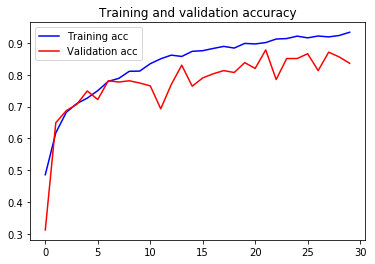

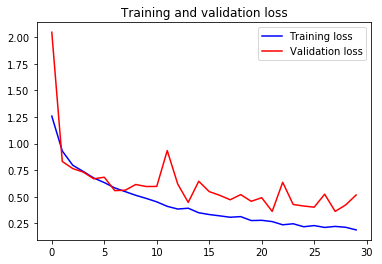

In [50]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()